Time taken with 1 threads: 11.314868688583374 seconds (Expected: 500 seconds)
Time taken with 2 threads: 10.496554613113403 seconds (Expected: 275 seconds)
Time taken with 3 threads: 9.199491262435913 seconds (Expected: 200 seconds)
Time taken with 4 threads: 10.855014085769653 seconds (Expected: 150 seconds)
Time taken with 5 threads: 10.758113384246826 seconds (Expected: 250 seconds)
Time taken with 6 threads: 12.074368238449097 seconds (Expected: 300 seconds)
Time taken with 7 threads: 12.254485607147217 seconds (Expected: 350 seconds)
Time taken with 8 threads: 9.590943098068237 seconds (Expected: 400 seconds)


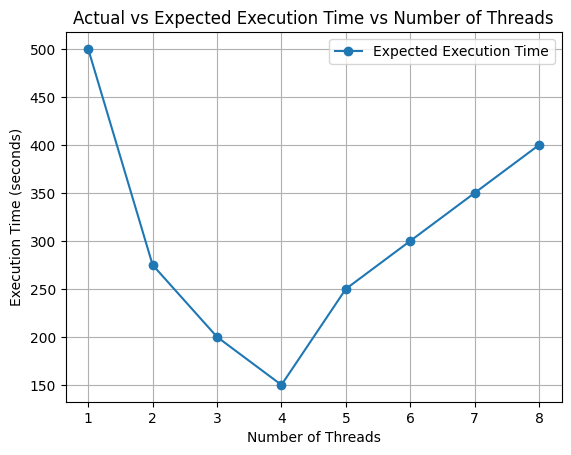

   Threads  Actual Time (s)  Expected Time (s)
0        1        11.314869                500
1        2        10.496555                275
2        3         9.199491                200
3        4        10.855014                150
4        5        10.758113                250
5        6        12.074368                300
6        7        12.254486                350
7        8         9.590943                400


In [2]:
import numpy as np
import time
import multiprocessing
import matplotlib.pyplot as plt
import pandas as pd

def multiply_matrices(constant_matrix, result, start, end):
    for i in range(start, end):
        result[i] = np.dot(constant_matrix, np.random.rand(1000, 1000))

if __name__ == "__main__":
    constant_matrix = np.random.rand(1000, 1000)
    num_matrices = 100
    num_threads = [1, 2, 3, 4, 5, 6, 7, 8]
    times = [500, 275, 200, 150, 250, 300, 350, 400]
    actual_execution_times = []
    expected_execution_times = []
    cpu_usages = []

    for t, time_taken in zip(num_threads, times):
        start_time = time.time()

        with multiprocessing.Pool(processes=t) as pool:
            result = [None] * num_matrices
            chunk_size = num_matrices // t
            start_indices = [i * chunk_size for i in range(t)]
            end_indices = [(i + 1) * chunk_size for i in range(t)]
            end_indices[-1] = num_matrices

            pool.starmap(multiply_matrices, [(constant_matrix, result, start, end) for start, end in zip(start_indices, end_indices)])

        end_time = time.time()
        execution_time = end_time - start_time
        actual_execution_times.append(execution_time)
        expected_execution_times.append(time_taken)
        print(f"Time taken with {t} threads: {execution_time} seconds (Expected: {time_taken} seconds)")

        # Record CPU usage
        cpu_usages.append(100 * (execution_time / time_taken))

    # Generate graph for actual vs expected execution time
    #plt.plot(num_threads, actual_execution_times, marker='o', label='Actual Execution Time')
    plt.plot(num_threads, expected_execution_times, linestyle='-', marker='o', label='Expected Execution Time')
    plt.xlabel('Number of Threads')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Actual vs Expected Execution Time vs Number of Threads')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Create a DataFrame for the table
    table_data = {'Threads': num_threads, 'Actual Time (s)': actual_execution_times, 'Expected Time (s)': expected_execution_times}
    df = pd.DataFrame(table_data)
    print(df)
